In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ppiech/openaigym/spinningup

In [12]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spinningup/data/v2.1-3_pendulum-v0/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spinningup/data/v2.1-3_pendulum-v0/



,Epoch,AverageEpRet,StdEpRet,EpLen,TotalEnvInteracts,StopIter - Goals2,LossPi - Goals2,LossValue - Goals2,AdvantageMean - Goals2,VVals - Goals2,...,AdvantageMean - Actions,VVals - Actions,Entropy - Actions,StabilityReward - Actions,LossActionInverse - Actions,LossGoalInverse - Actions,Unit,Condition1,Condition2,Performance
0,0,-1370.84380,248.323730,200.0,2400,79.0,2.559026e-07,4646.546000,-52.675304,0.032519,...,-12.781315,-0.151650,0.913174,0.414409,0.517276,0.221823,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1370.84380
1,1,-1211.91000,178.132660,200.0,4800,53.0,-1.808008e-08,2956.867200,-41.352825,-6.906798,...,-4.782047,-6.591547,0.905116,0.406053,0.413907,0.175622,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1211.91000
2,2,-1418.02590,258.312650,200.0,7200,79.0,2.384186e-09,1729.831700,-27.581963,-33.842056,...,-7.938978,-5.514297,0.872393,0.384896,0.396595,0.143533,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1418.02590
3,3,-1376.03480,275.257800,200.0,9600,79.0,7.947286e-09,442.138340,-1.052016,-65.150350,...,-6.255808,-6.811245,0.848658,0.370582,0.382299,0.119350,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1376.03480
4,4,-1385.11560,243.345210,200.0,12000,79.0,2.106031e-08,236.370760,-1.360935,-65.527954,...,-6.381465,-6.755721,0.855094,0.374100,0.376066,0.100931,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1385.11560
5,5,-1500.77830,166.524230,200.0,14400,79.0,-1.589457e-08,160.644640,-2.120037,-69.668280,...,-7.004973,-7.318932,0.839828,0.364864,0.369672,0.089673,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1500.77830
6,6,-1392.45790,251.767560,200.0,16800,79.0,5.563100e-09,179.367500,1.170786,-68.845050,...,-6.567760,-6.667716,0.805612,0.370285,0.360727,0.076792,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1392.45790
7,7,-1432.63670,189.162540,200.0,19200,79.0,-4.768372e-09,153.011350,-0.784596,-68.439964,...,-6.741989,-6.940216,0.776339,0.350314,0.349779,0.066217,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1432.63670
8,8,-1267.88380,182.450710,200.0,21600,58.0,-9.536743e-09,147.179140,1.842326,-64.231700,...,-5.942238,-6.078651,0.771061,0.355943,0.345332,0.055838,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1267.88380
9,9,-1362.58970,110.592865,200.0,24000,79.0,3.178914e-09,115.025246,-1.376642,-64.216650,...,-6.406947,-6.592149,0.791340,0.334049,0.345853,0.048251,3,v2.1-3_pendulum-v0,v2.1-3_pendulum-v0-3,-1362.58970


In [13]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch,goal_octaves
0,v2.1-3_pendulum-v0,2400,6


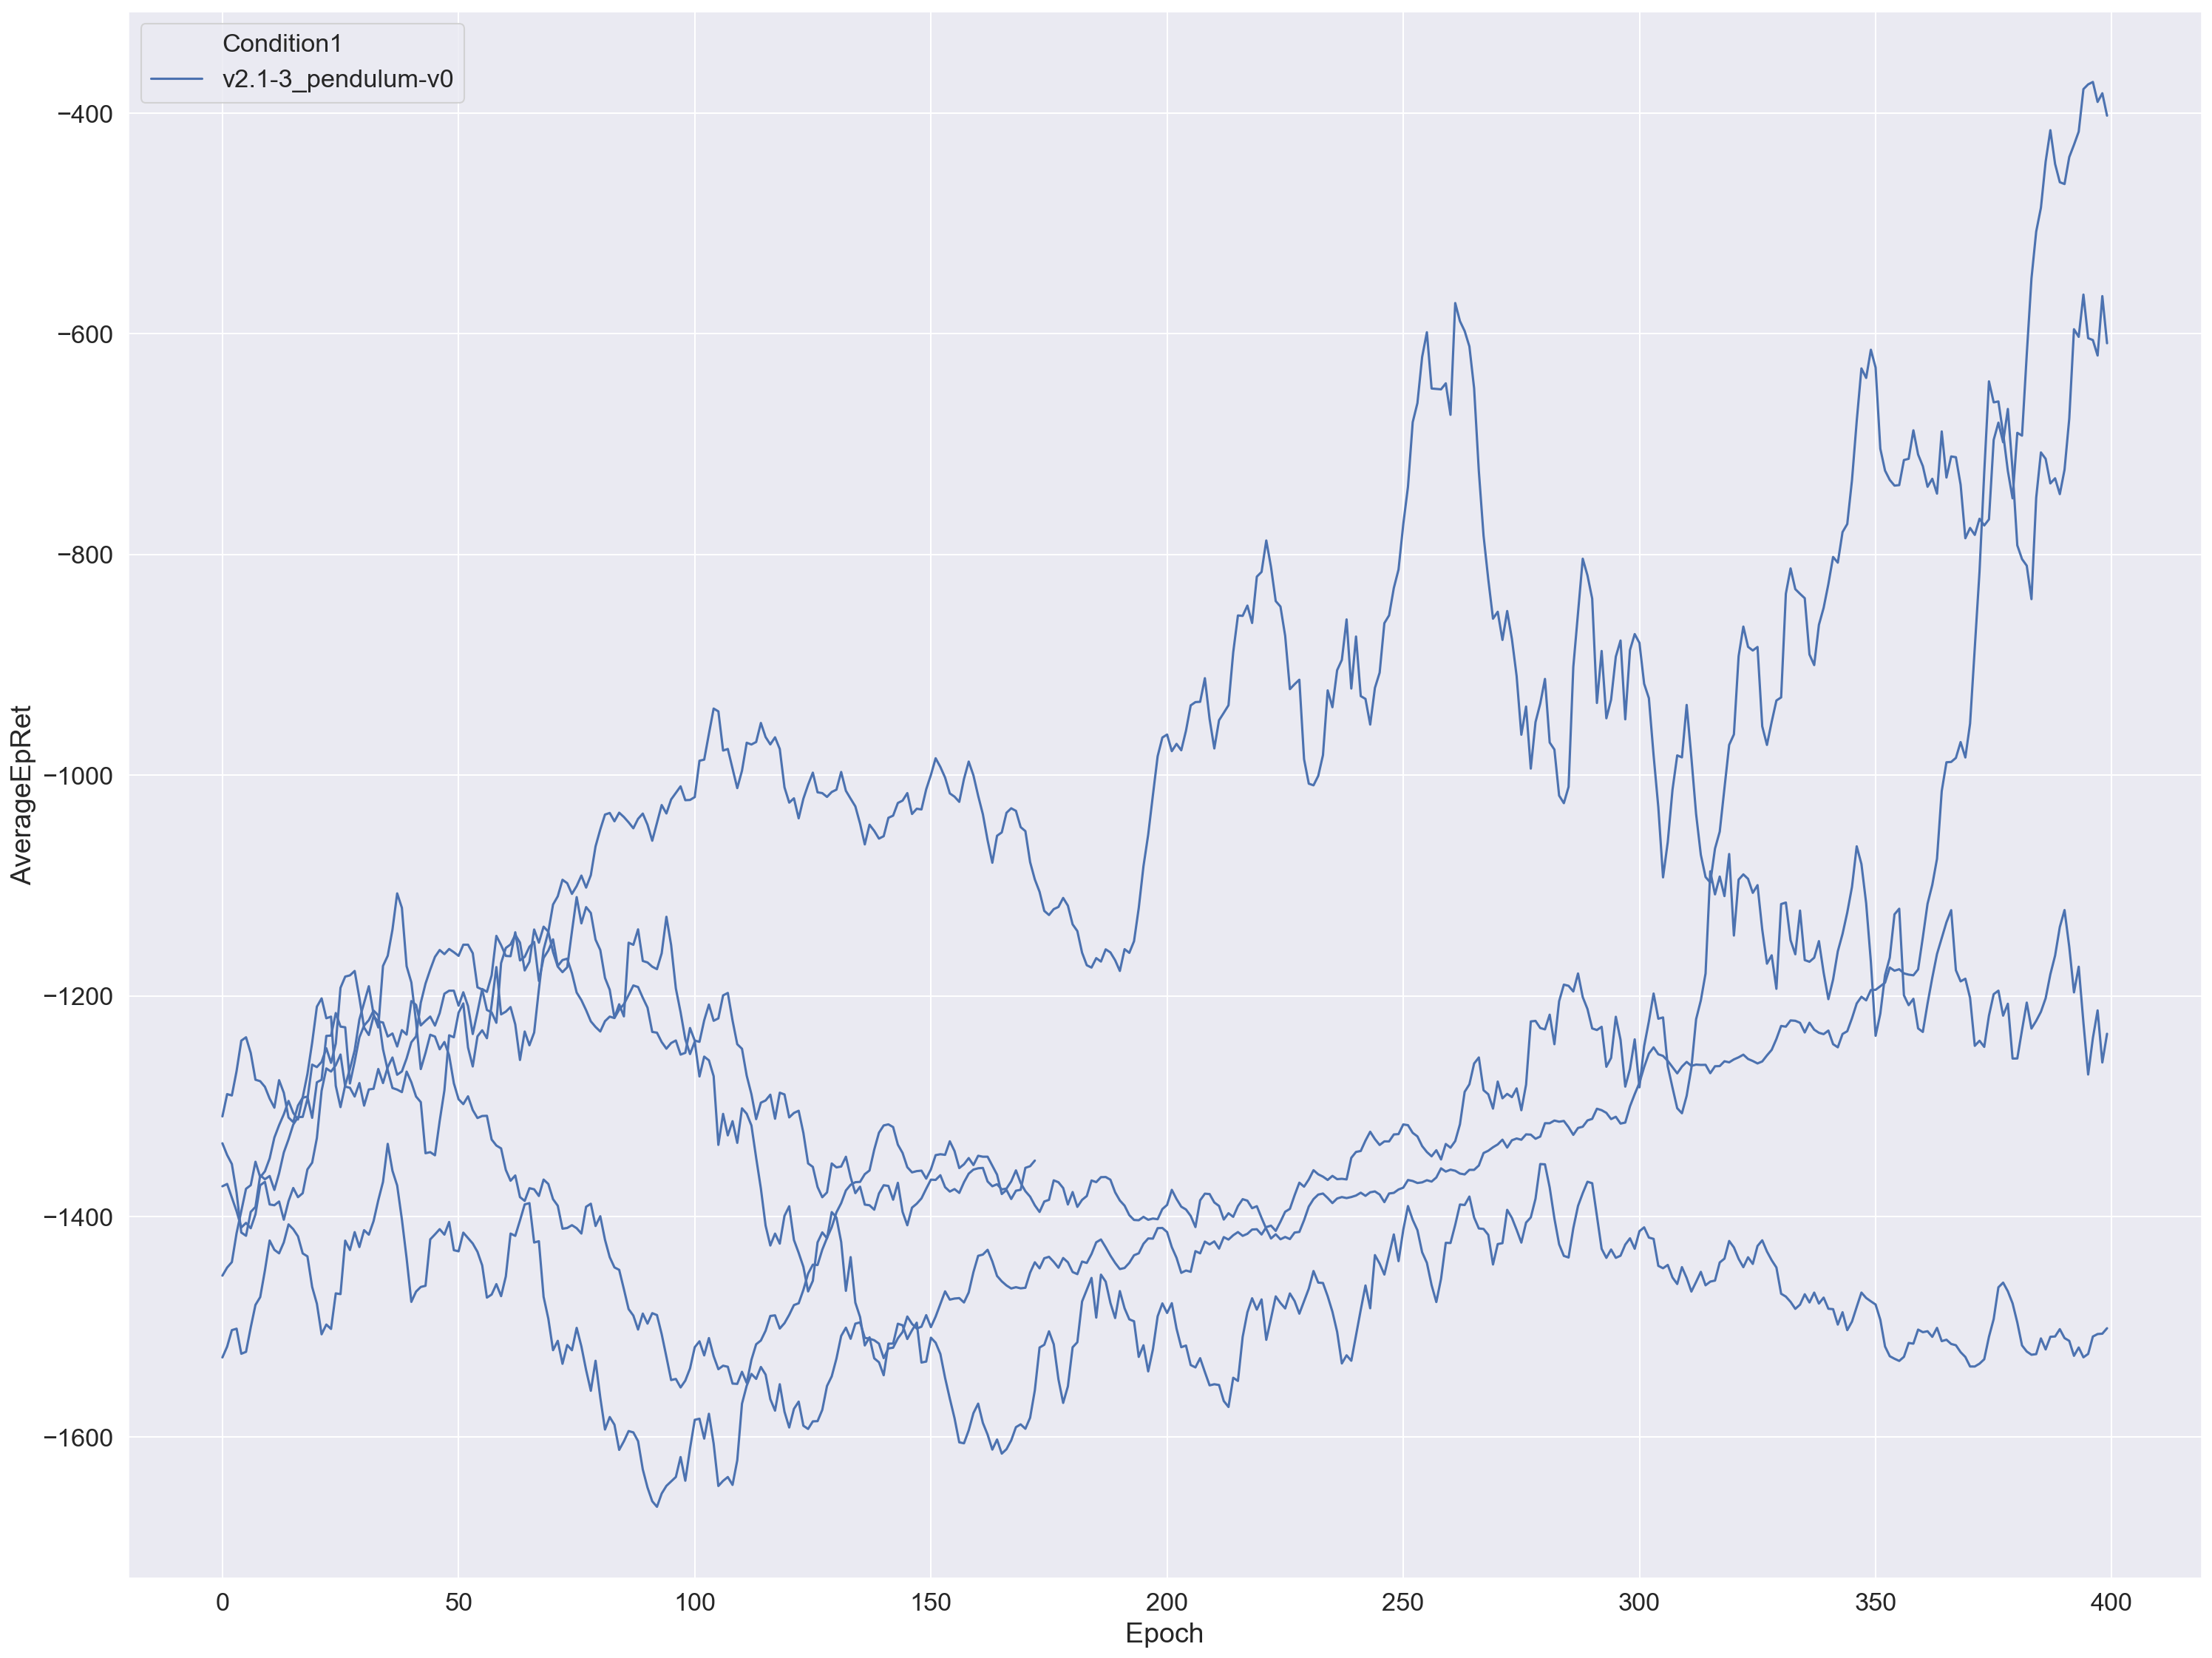

In [14]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, units='Condition2', estimator=None)
plt.show()

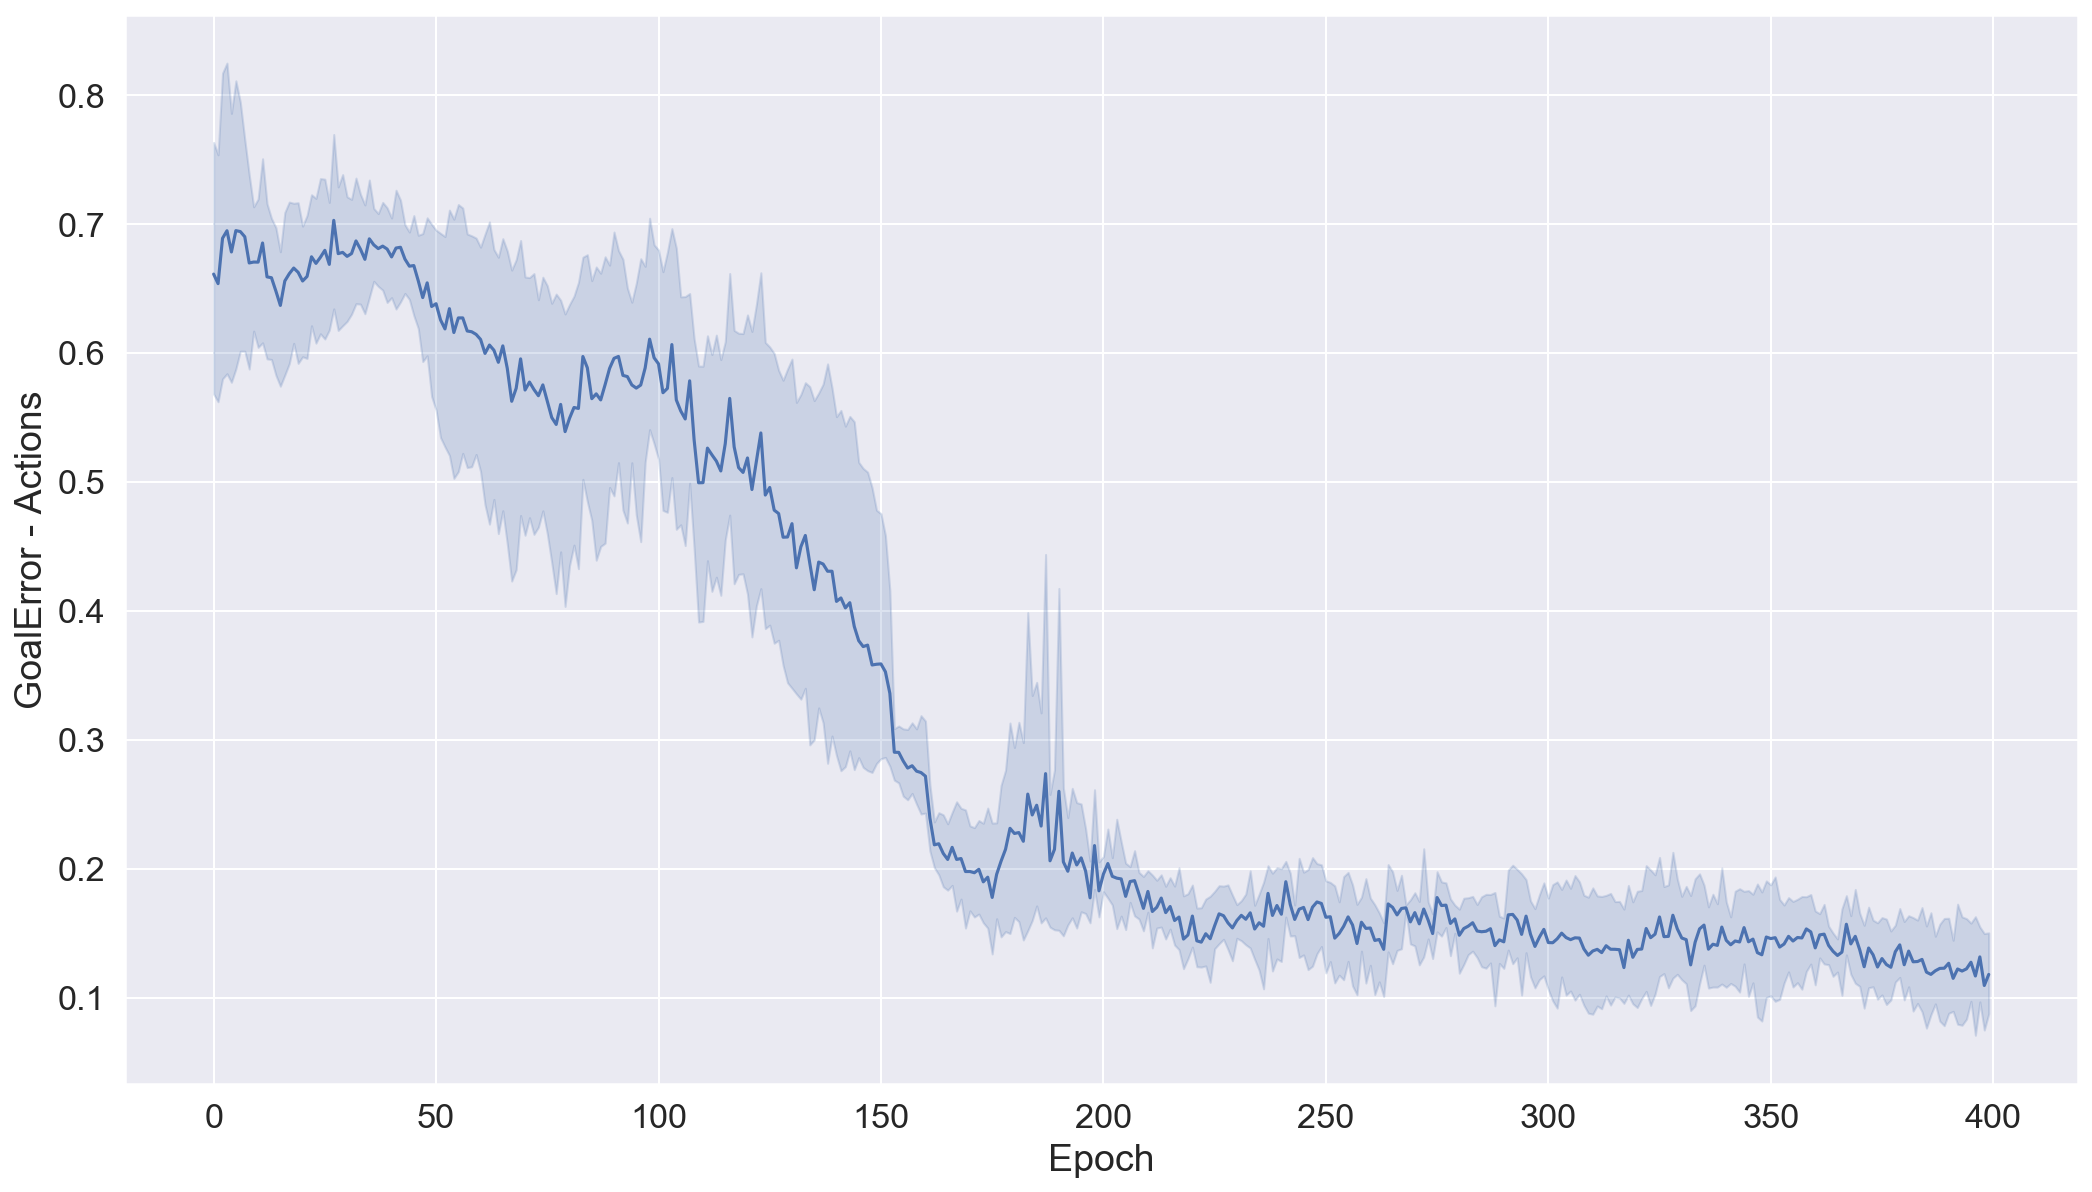

In [15]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalError - Actions', smooth=1, show_legend=False, estimator='mean')
plt.show()

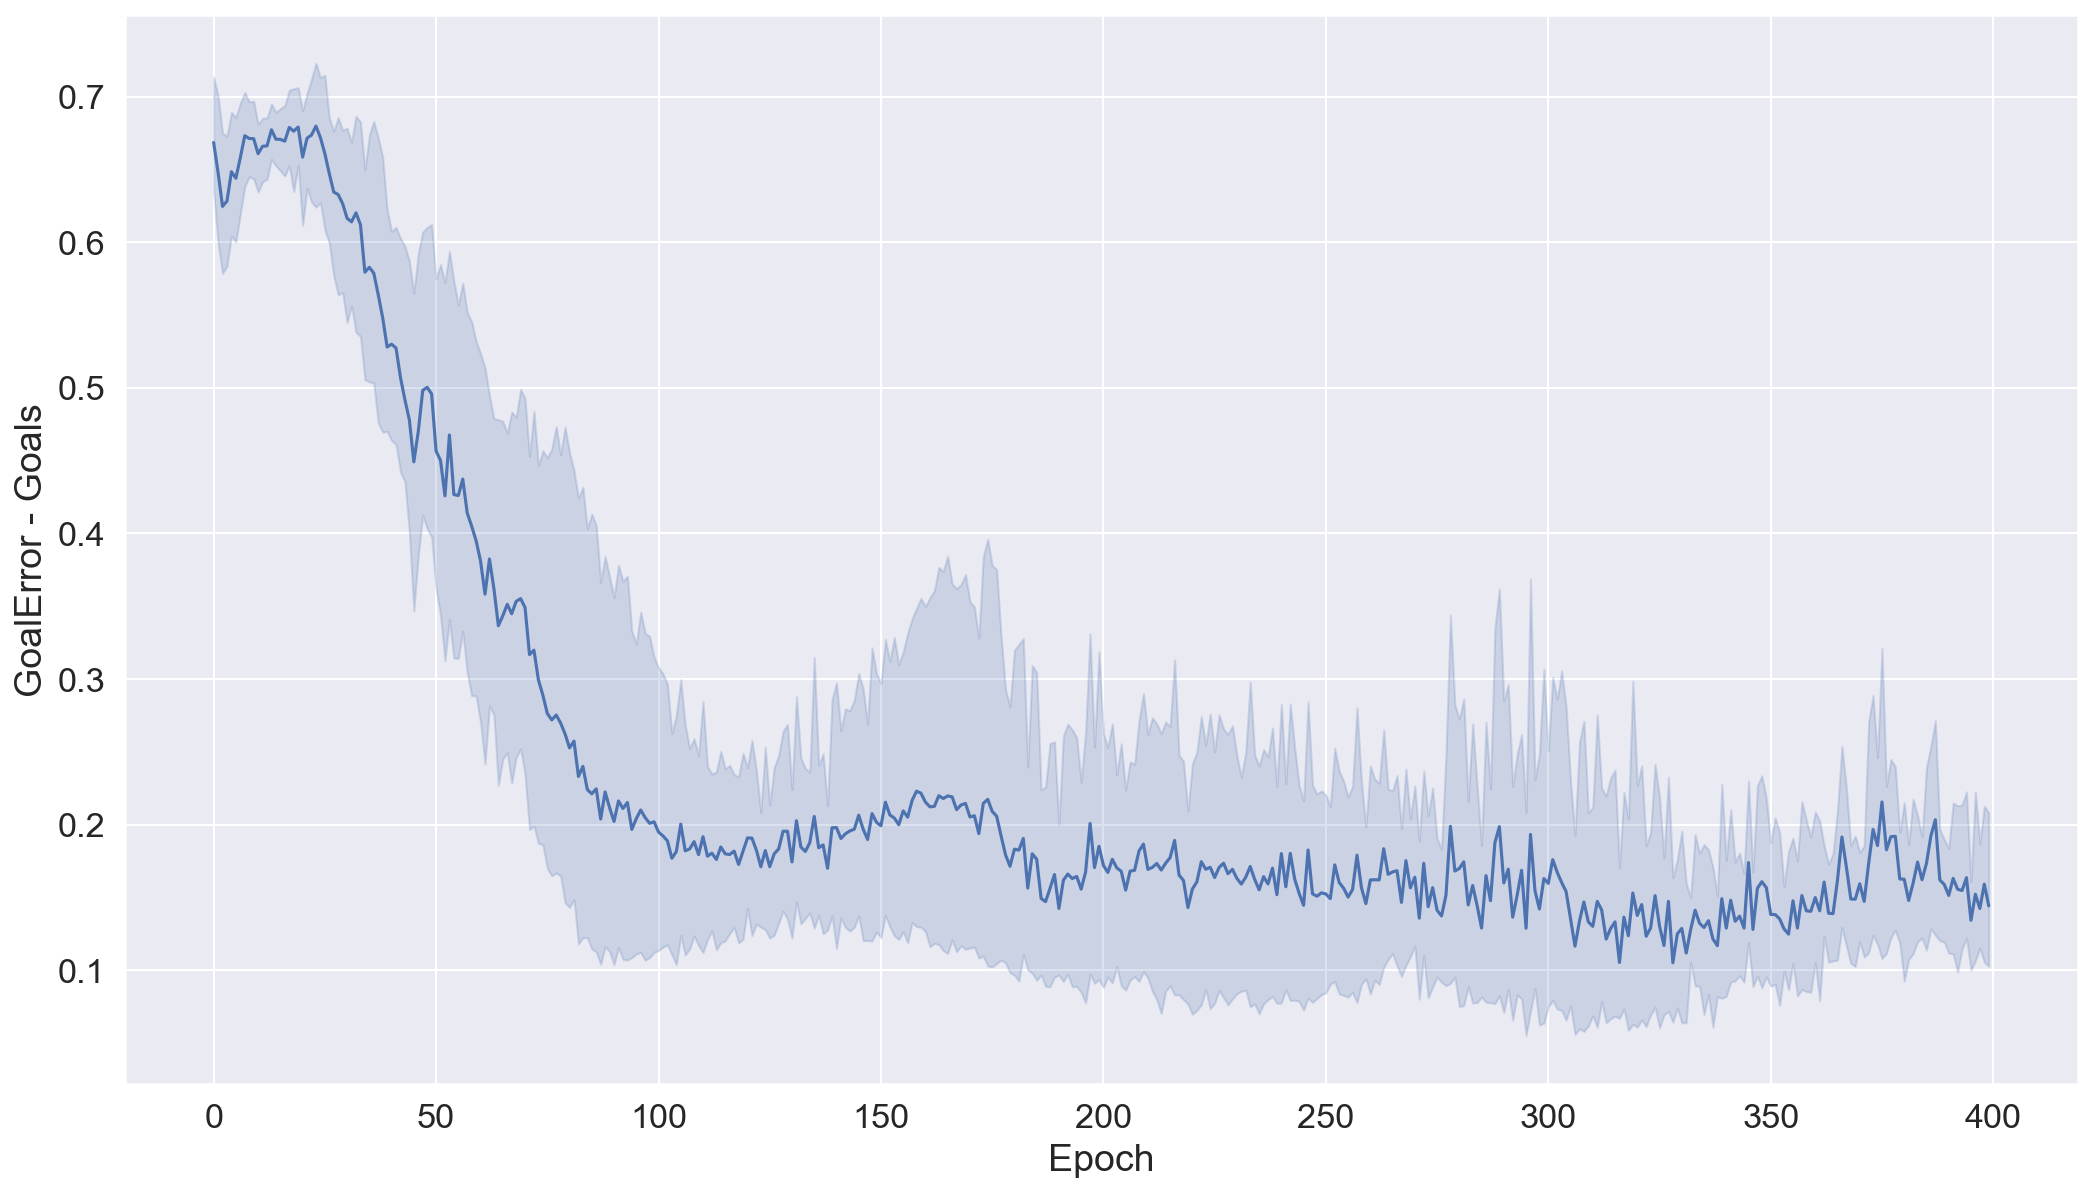

In [16]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalError - Goals', smooth=1, show_legend=False, estimator='mean')
plt.show()

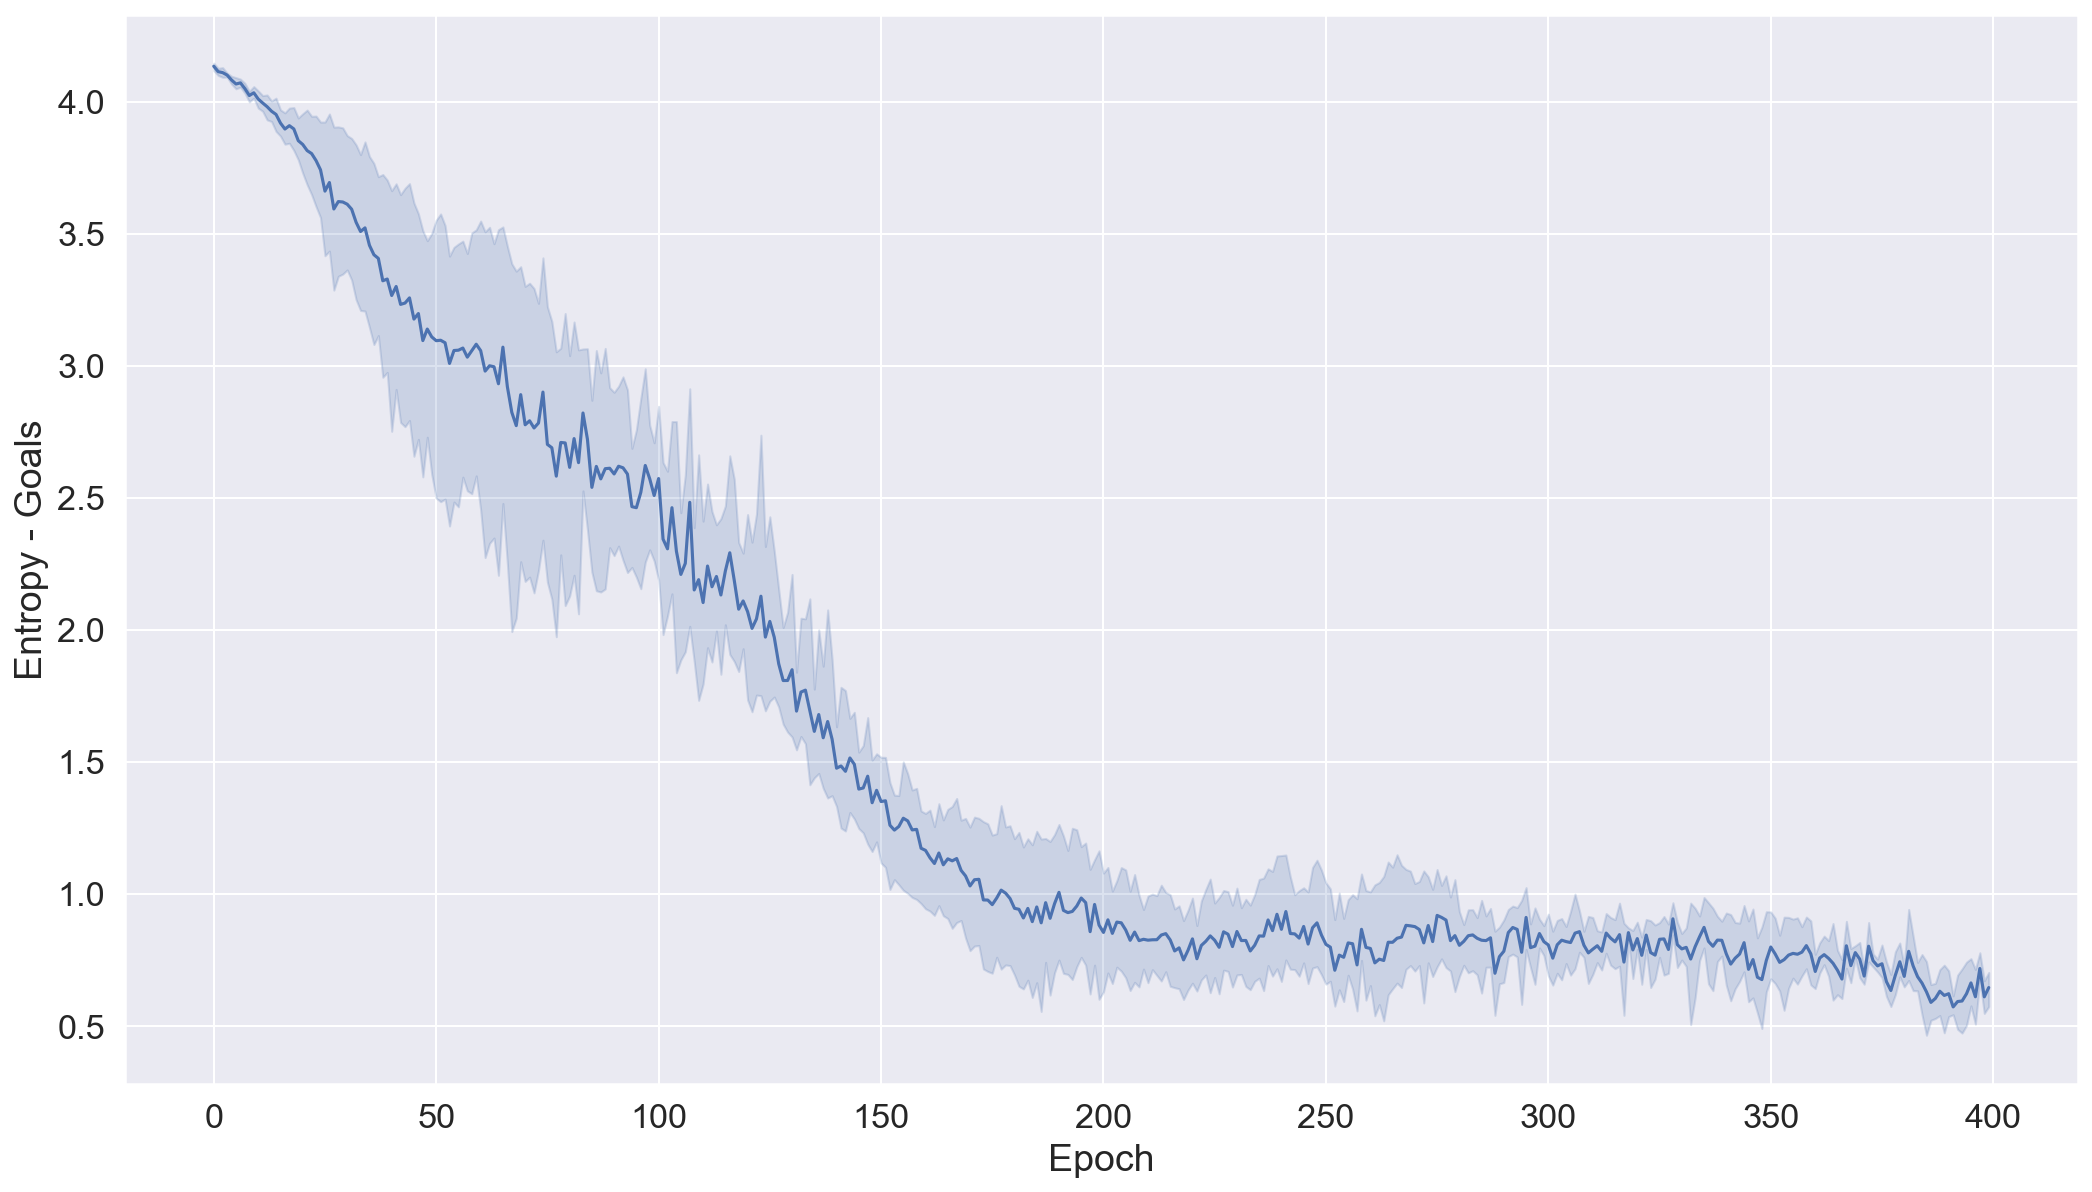

In [17]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='Entropy - Goals', smooth=1, show_legend=False)
plt.show()

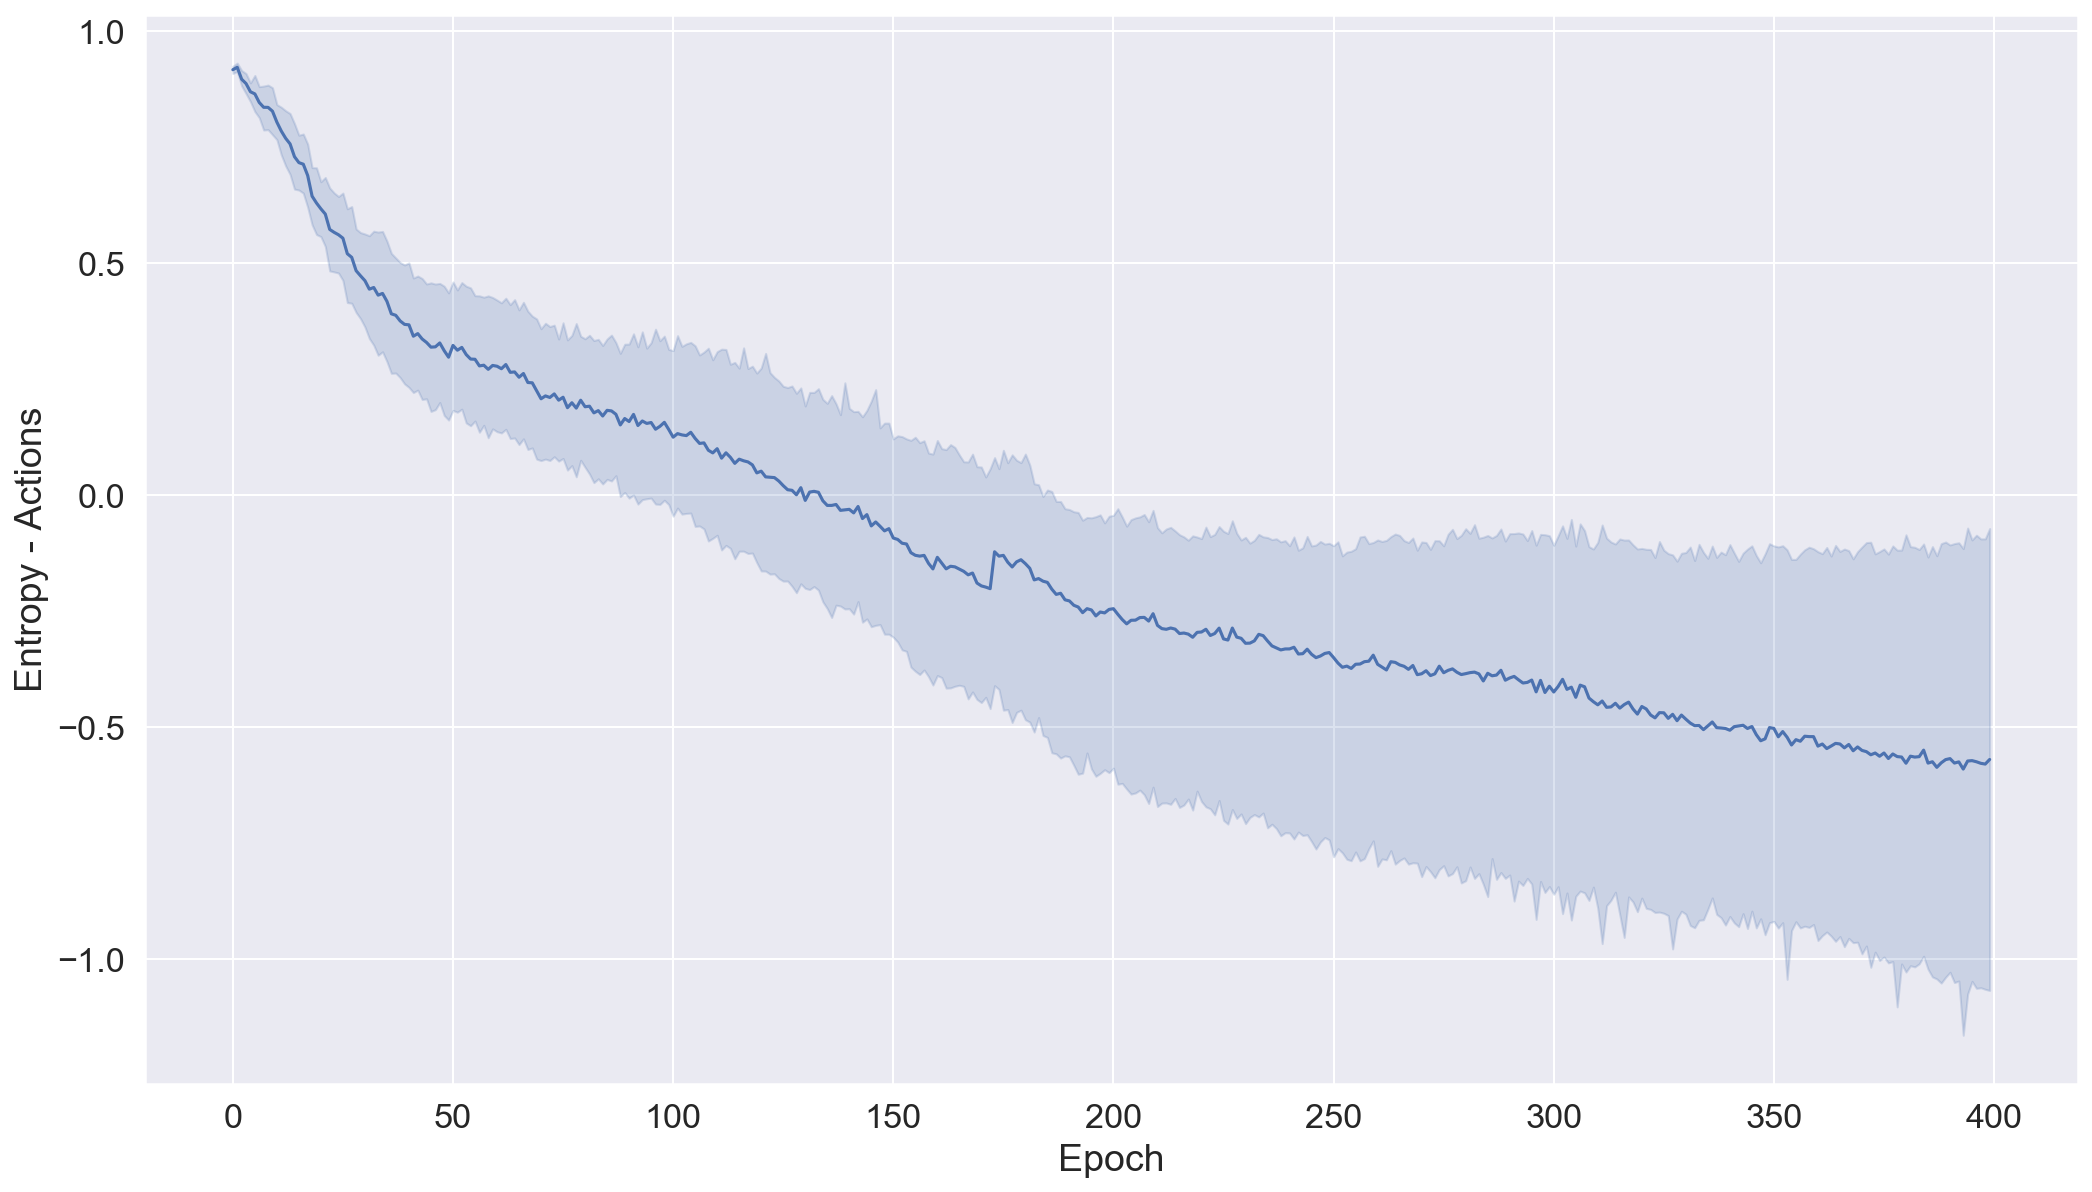

In [18]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='Entropy - Actions', smooth=1, show_legend=False)
plt.show()

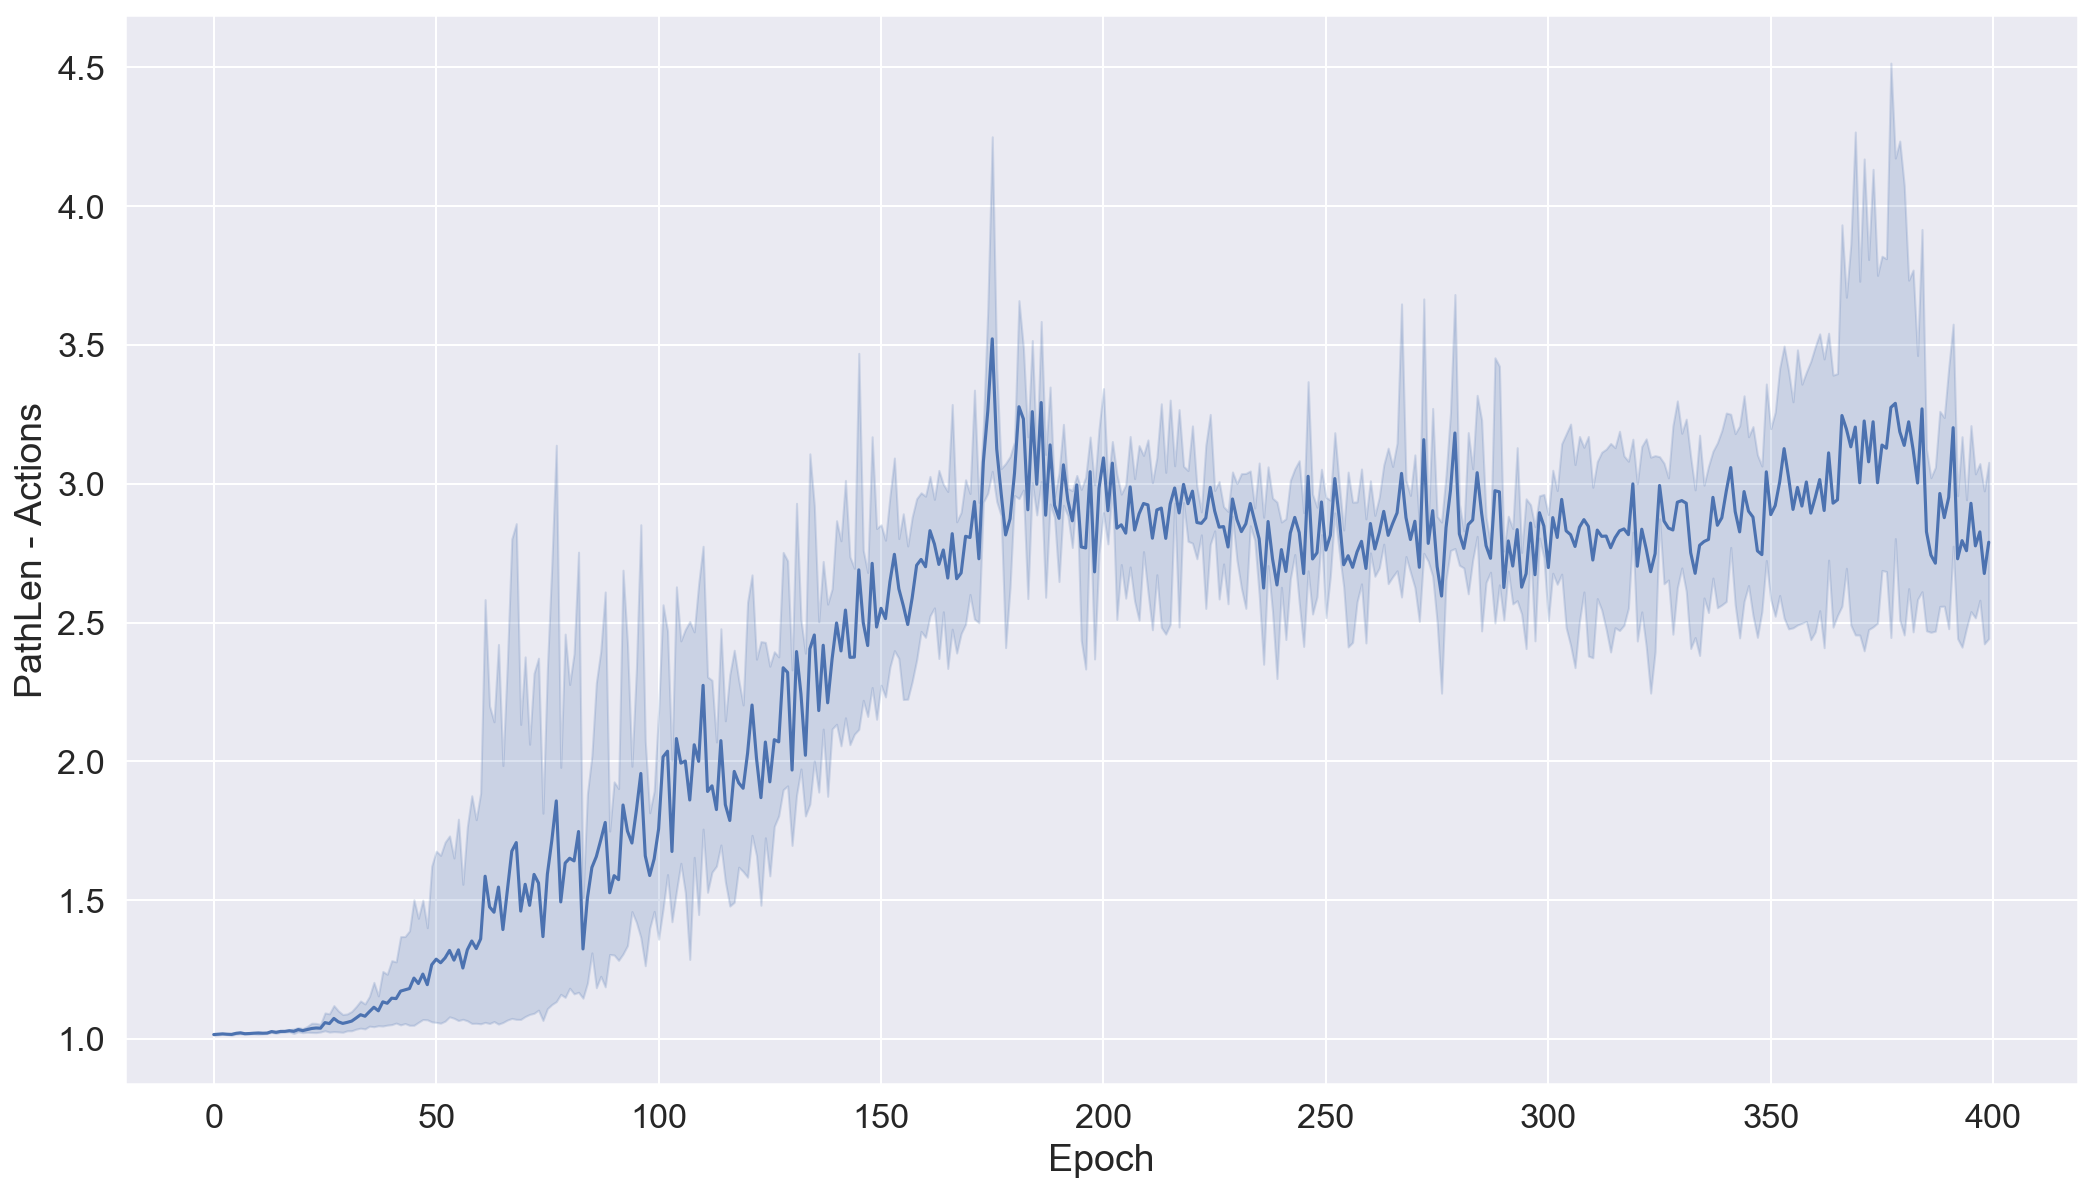

In [19]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='PathLen - Actions', smooth=1, show_legend=False)
plt.show()

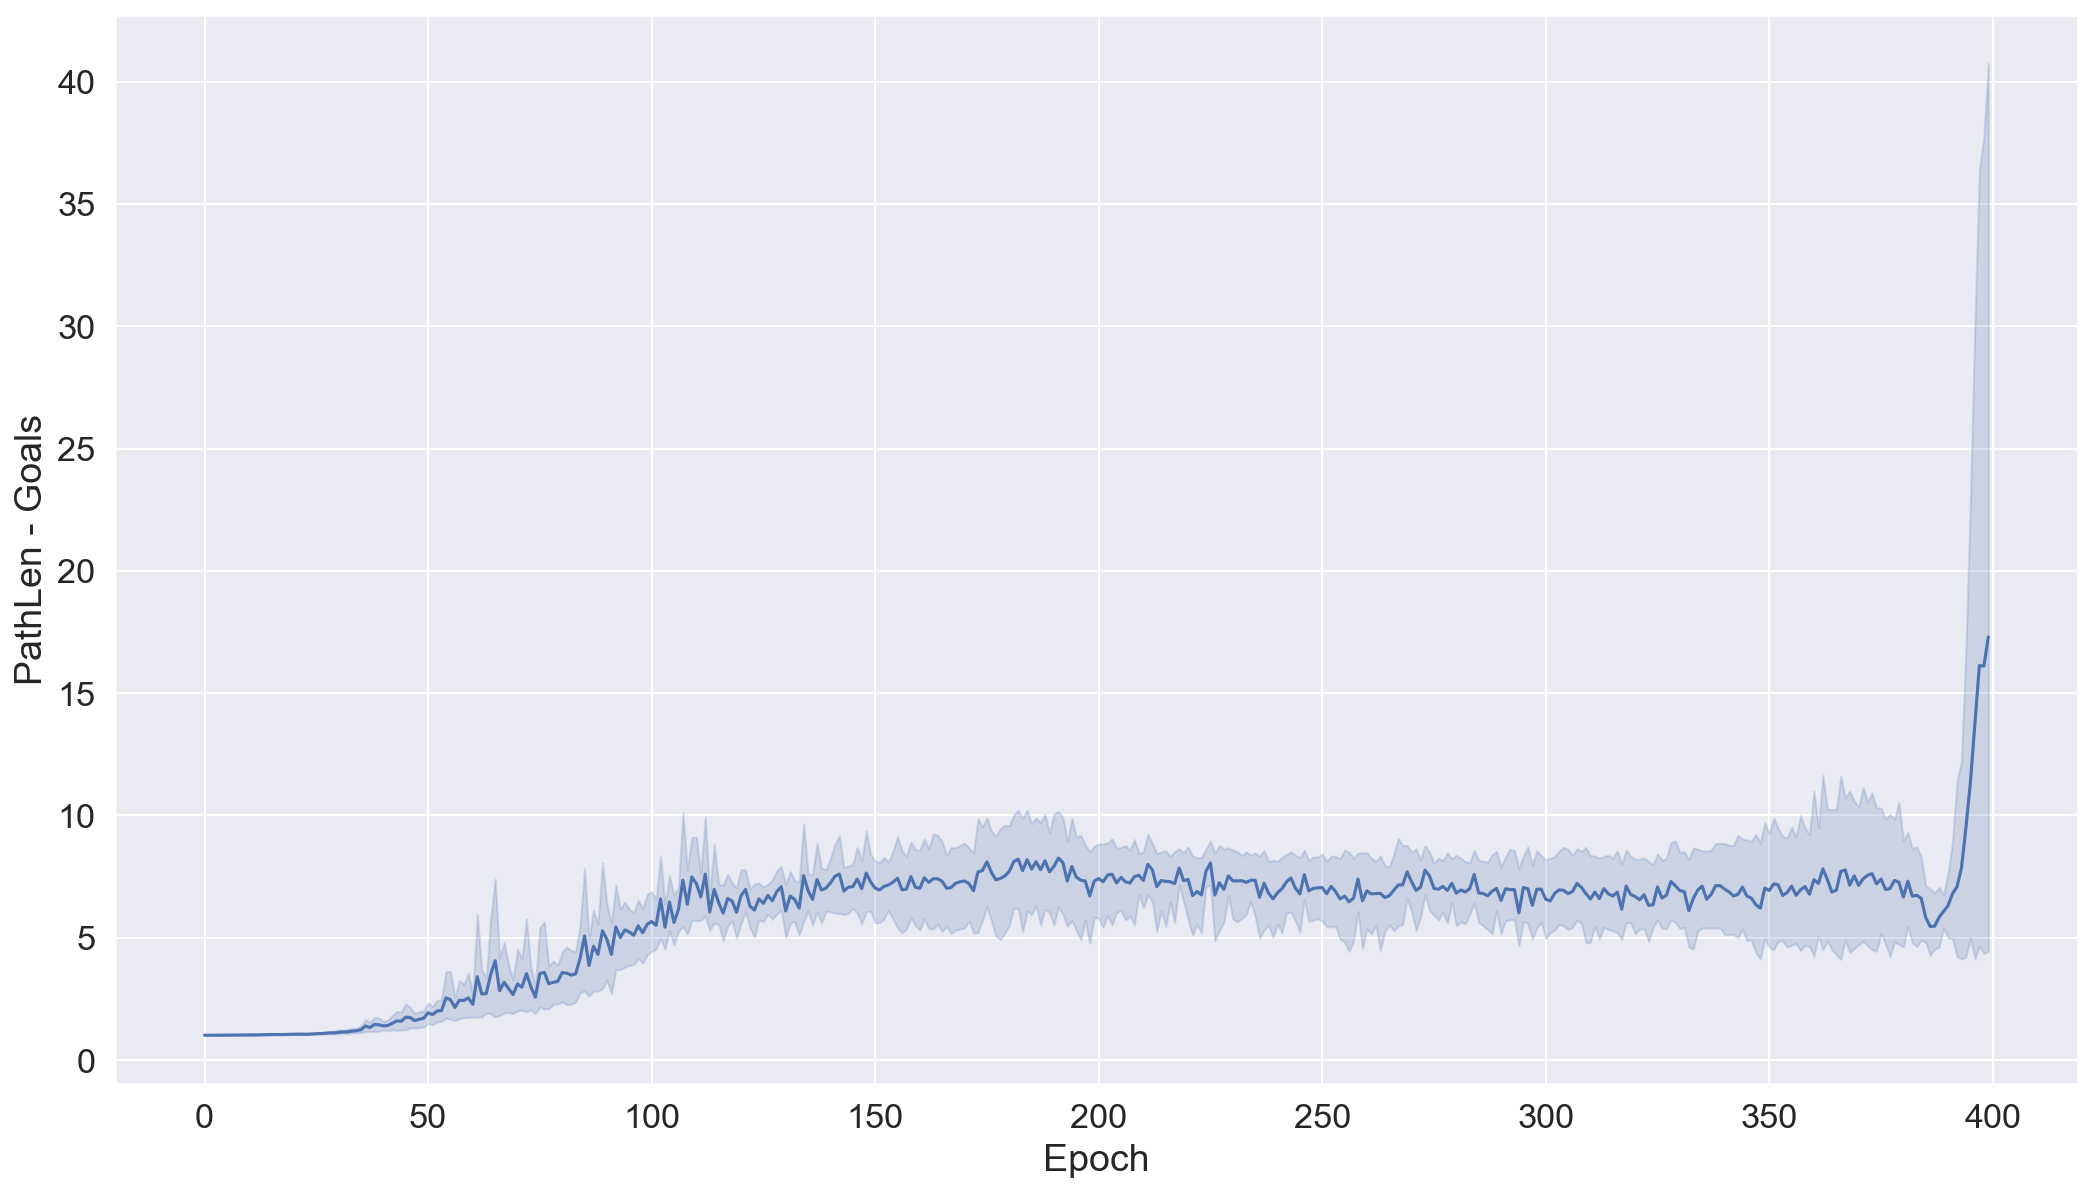

In [20]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='PathLen - Goals', smooth=1, show_legend=False)
plt.show()